In [1]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt

Synthetic Data Generation

In [2]:
ker1=kernel(length=np.array([1]),scale=1,nugget=1e-7,name='matern2.5',zero_mean=1)
ker2=kernel(length=np.array([1]),scale=1,nugget=1e-7,name='matern2.5',zero_mean=1)
ker3=kernel(length=np.array([1]),scale=1,nugget=1e-7,name='matern2.5',zero_mean=1)
ker_all=combine(ker1,ker2,ker3)

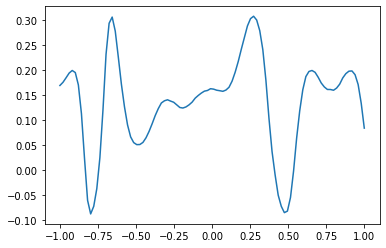

In [3]:
n=100
N=1
data=np.linspace(-1,1,n)[:,None]
syn=path(data,ker_all)
samp=syn.generate(N)
p=plt.plot(data,samp) 

Prediction

In [4]:
in_dat=data[::10]
out_dat=samp[::10]

In [5]:
m=dgp(in_dat,out_dat,ker_all)

In [9]:
z=np.linspace(-1,1,100)[:,None].reshape(-1,1)
mu,var=m.predict(z, N=1000, burnin=500,method='mean_var')

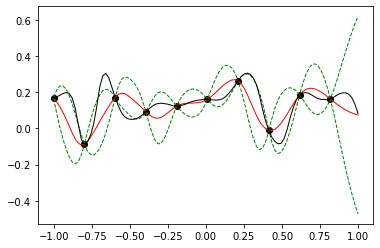

In [10]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(data,samp,color='black',lw=1)
plt.scatter(data[::10],samp[::10],color='black')

In [54]:
sample=m.predict(z, N=0, burnin=500,method='sampling')

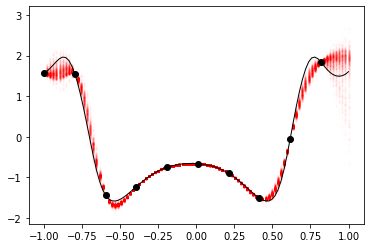

In [55]:
fig = plt.figure()
ax = fig.gca()
for i in range(len(sample)):
    surf = ax.scatter(z.flatten(),sample[i,],s=2,color='r',alpha=0.01)
plt.plot(data,samp,color='black',lw=1)
plt.scatter(data[::10],samp[::10],color='black')